<a href="https://colab.research.google.com/github/dileep-rawat/Capstone-Project-1-Hotel-Booking-Analysis/blob/main/Final_EDA(Group)__Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<u>**Problem:**</u>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

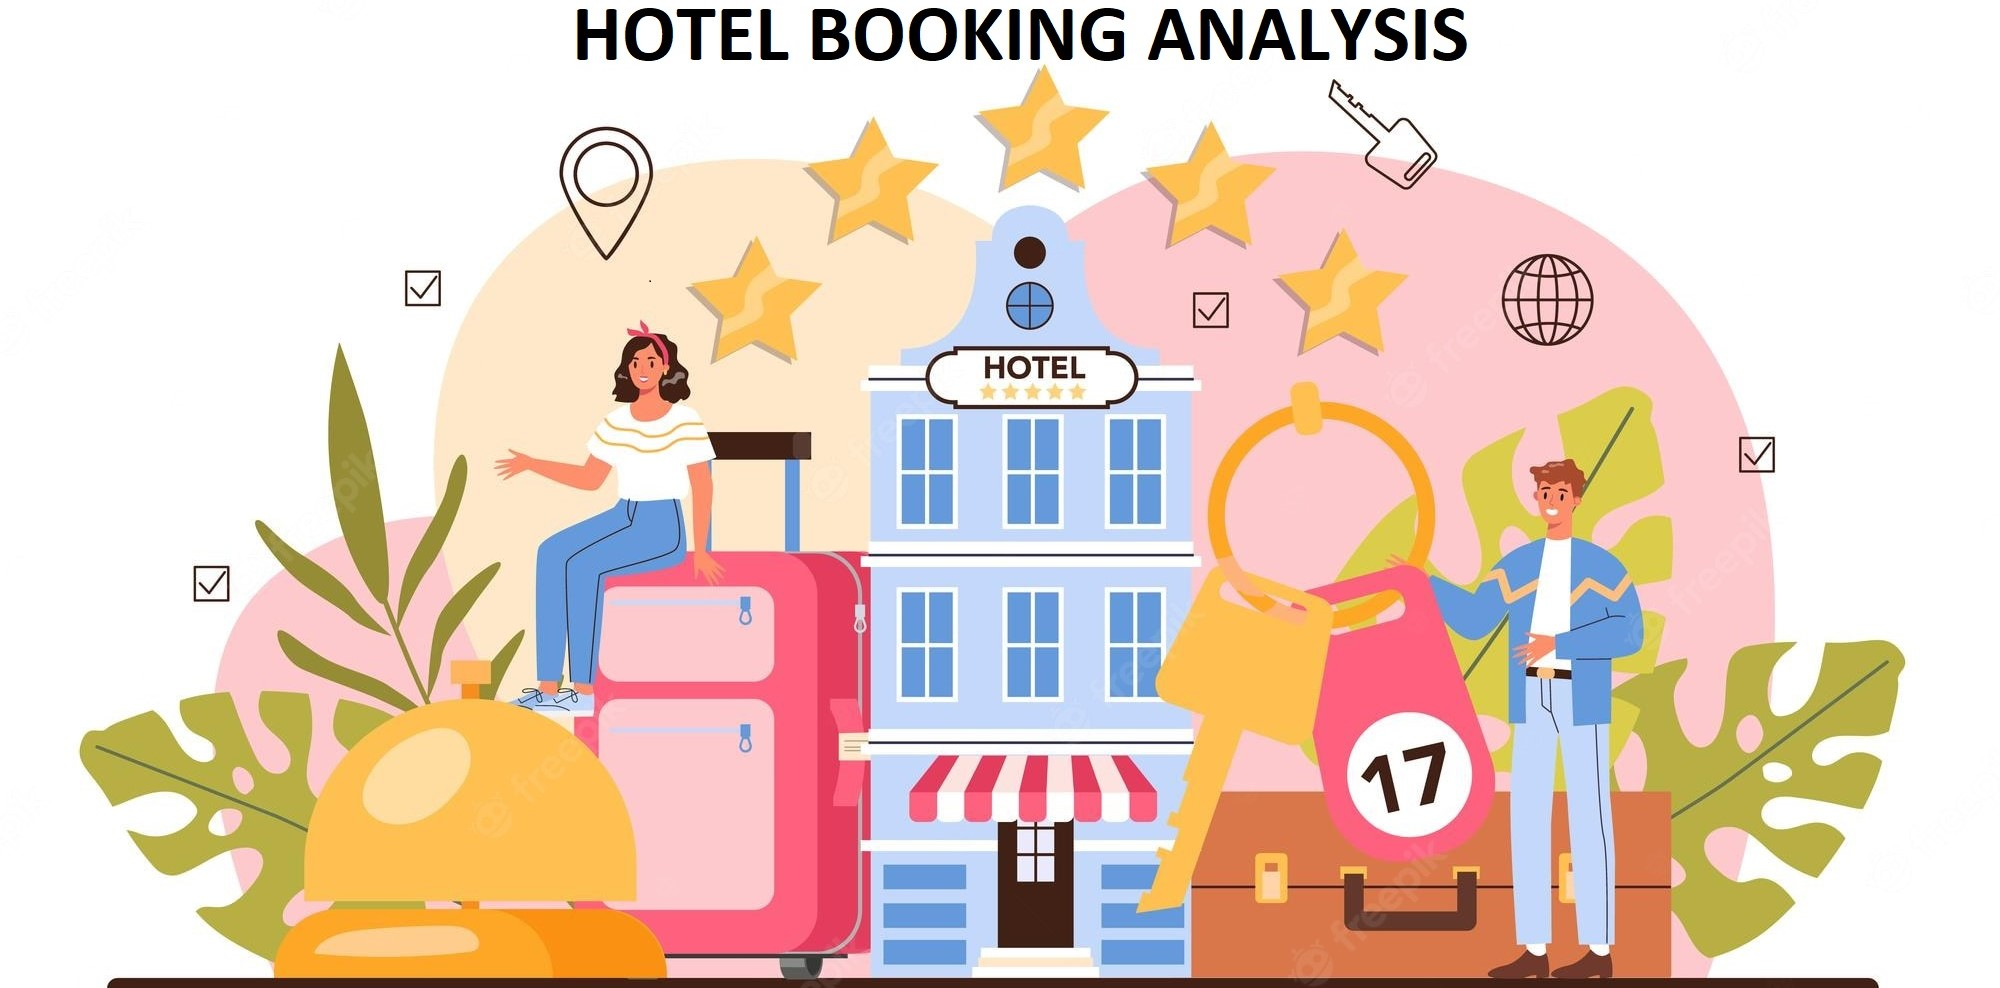

#**<u>Objective:-**</u>

We have a Dataset of hotel booking analysis from years 2014 to 2017 and having 32 columns. Our aim is to find the relevent insights from this dataset. The objectives are as follows:   

>**1. Univariate Analysis:**

>**2.	Hotel wise Analysis:** 

>**3. Distribution channel wise Analysis:** 

>**4.	Booking cancellation Analysis:** 

>**5. Customer Centric Analysis:**

>**6. Conclusion:**

>**7. Final Summary of conclusion:**

#**<u>Importing Essential Libraries:-**

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%lsmagic
%matplotlib inline

#importing the folium library
import folium                                # searched on google 
import plotly.express as px

#**<u>Mounting drive:-</u>**

In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## csv file location and reading csv file:-

---



In [201]:
hotel_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project/Exploratory Data Analysis/Hotel Booking Analysis- Dileep Rawat/Hotel Bookings.csv')

#**<u>Data Exploration:-**

In [202]:
#checking the shape ( rows and column numbers)
hotel_df.shape

(119390, 32)

In [203]:
# Checking first 5 rows
hotel_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [204]:
# Checking last 5 rows
hotel_df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [205]:
# Looking into info
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## **Column information:**

- **Hotel**
 * H1: Resort hotel
 * H2: City hotel
- **is_canceled**
 * 1: Canceled 
 * 0: Not canceled
- **lead_time**
 * No of days thaat elapsed between entering date of booking into property management system and arrival date
- **arrival_date_year**
 * Year of arrival date (2015-2017)
- **arrival_date_month**
 * Month of arrival date (Jan - Dec)
- **arrival_date_week_numberr**
 * Week number of year for arrival date (1-53)
- **arrival_date_day_of_month**
 * Day of arrival date
- **stays_in_weekend_nights**
 * No of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**
 * No of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel
- **Adults** 
- **Children**
- **Babies**
- **meal** 
 * Type of meal booked. Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**
- **market_segment** (a group of people who share one or more common characteristics, lumped together for marketing purposes)
 * TA: Travel agents
 * TO: Tour operators 
- **distribution_channel** (A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer)
 * TA: Travel agents
 * TO: Tour operators
- **is_repeated_guest** (value indicating if the booking name was from repeated guest)
 * 1: Yes
 * 0: No
- **previous_cancellations**
 * Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**
 * Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**
 * Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**
 * Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes**
 * Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**
 * Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**
 * ID of the travel agency that made the booking 
- **company**
 * ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **day_in_waiting_list**
 * Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**
 * Contract - when the booking has an allotment or other type of contract associated to it; 
 * Group – when the booking is associated to a group; 
 * Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
 * Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr (average daily rate)**
 * average daily rate = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
- **required_car_parking_spaces**
 * Number of car parking spaces required by the customer 
- **total_of_special_requests**
 * Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**
 * Canceled – booking was canceled by the customer; 
 * Check-Out – customer has checked in but already departed; 
 * No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**
 * Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [206]:
# Describing Dataframe
hotel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [207]:
# Exploring unique element from DataFrame

print(hotel_df['hotel'].unique())
print(hotel_df['is_canceled'].unique())
print(hotel_df['arrival_date_year'].unique())
print(hotel_df['meal'].unique())
print(hotel_df['market_segment'].unique())
print(hotel_df['distribution_channel'].unique())
print(hotel_df['children'].unique())
print(hotel_df['country'].unique())

['Resort Hotel' 'City Hotel']
[0 1]
[2015 2016 2017]
['BB' 'FB' 'HB' 'SC' 'Undefined']
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
[ 0.  1.  2. 10.  3. nan]
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS

#<u>**Data Cleaning:**</u>
### Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

### Data cleaning is done in the following steps:-  
1) Remove duplicate rows  
2) Handling missing values.  
3) Convert columns to appropriate datatypes.  
4) Adding important columns

## Step-1: Remove duplicate rows:

In [208]:
# removing duplicate rows
hotel_df.duplicated().value_counts()            # #true means duplicate rows

False    87396
True     31994
dtype: int64

So we have 31994 duplicate rows in our data and we will drop the duplicate rows from our data.

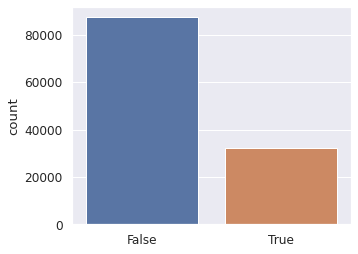

In [209]:
# Visulaizing duplicate values through bargraph.
plt.figure(figsize=(5,4))
sns.countplot(x=hotel_df.duplicated())

In [210]:
# Dropping duplicate values
hotel_df.drop_duplicates(inplace = True)

In [211]:
# Exploring shape
hotel_df.shape

(87396, 32)

We will perform our EDA on this DataFrame.

## Step-2: Handling missing values

In [212]:
# Columns having missing values
hotel_df.isna().sum().sort_values(ascending= False).reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0
6,booking_changes,0
7,deposit_type,0
8,hotel,0
9,previous_cancellations,0


Text(0.5, 1.0, 'Missing values in column')

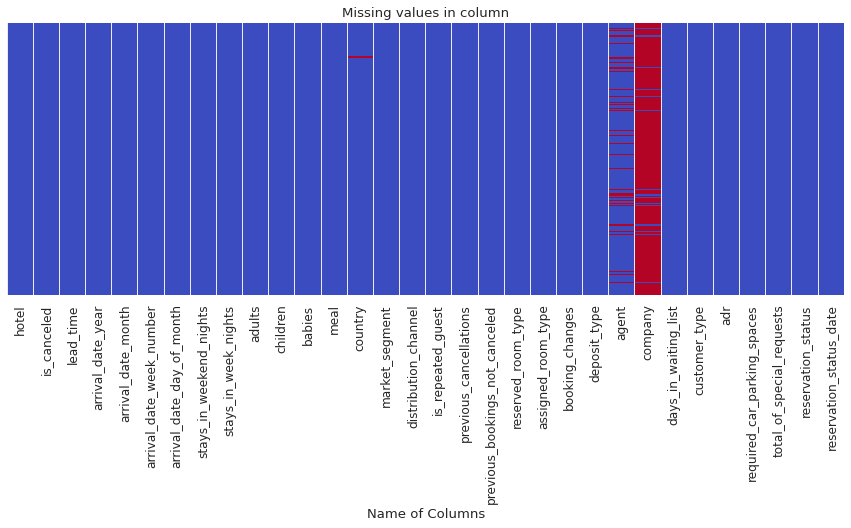

In [213]:
# Visulaizing null values through heatmap.

plt.figure(figsize=(15, 5))
sns.heatmap(hotel_df.isnull(), cbar=False, yticklabels=False,cmap='coolwarm')
plt.xlabel("Name of Columns")
plt.title("Missing values in column")

### Here, company and agent columns are null and the reason being customer did not book hotel via any agent or via any company.
### We will replace null values by 0 in these columns -

In [214]:
# Replacing the 'company','agent' and 'children' with Zero
hotel_df[['company','agent','children']]= hotel_df[['company','agent','children']].replace(np.nan,0)

In [215]:
# Replacing the 'country' with others
hotel_df['country']= hotel_df['country'].replace(np.nan,'others')

In [216]:
# sorted manner
hotel_df.isna().sum().sort_values(ascending= False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null_counts'})

,Columns,Null_counts
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


### We have sucessfully handled the missing values.

## Step-3:  Convert columns to appropriate datatypes:

In [217]:
# Converting from float to int
hotel_df = hotel_df.astype({'children':'int64','agent':'int64','company':'int64'})
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

## Step-4.) Adding new columns

In [218]:
# Adding total people num as column, i.e. total_stay = stays_in_weekend_nights + stays_in_week_nights
hotel_df['total_stay']= hotel_df['stays_in_weekend_nights']+ hotel_df['stays_in_week_nights']


# Adding total people num as column, i.e. total people num = num of adults + children + babies
hotel_df['total_people'] = hotel_df['adults']+hotel_df['children']+hotel_df['babies']
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2


# <u>**EDA (Exploratory Data Analysis):**

Lets first find the correlation between the numerical data.

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [219]:
# defining corr dataframe
corr_df = hotel_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_people','total_stay']]

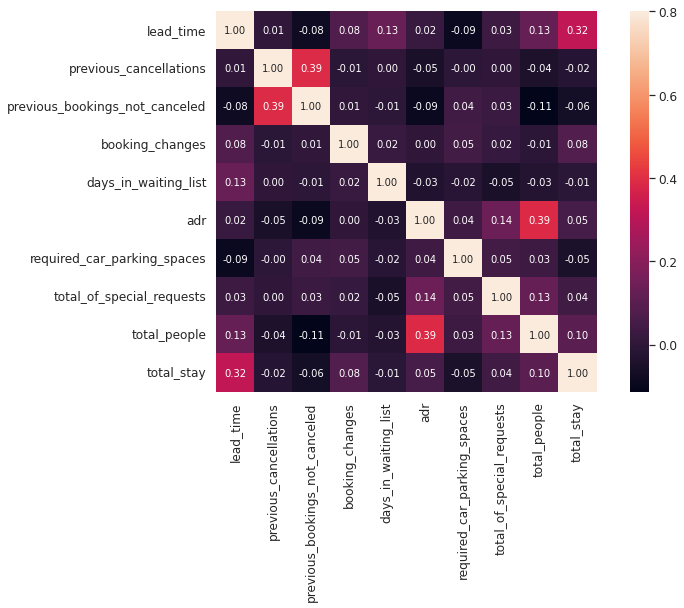

In [220]:
#correlation matrix
corrmat = corr_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

#**1.<u>Univariate Analysis:**</u>

We will analyse our data on below mentioned points.

1.What is the most preferred meal by customers?

2.What is the percentage distribution of required car parking spaces?

3.What is the percentage of booking changes made by the customer?

4.What is Percentage distribution of Deposit type ?

5.Which is the most preferred room type by the customers?


## Q1.) What is the most preferred meal by customers?

In [221]:
# Preferred meal
most_preferred_meal = hotel_df['meal'].value_counts().reset_index().rename(columns={'index':'meal', 'meal':'Number_of_preferred_meal'})
most_preferred_meal

,meal,Number_of_preferred_meal
0,BB,67978
1,SC,9481
2,HB,9085
3,Undefined,492
4,FB,360


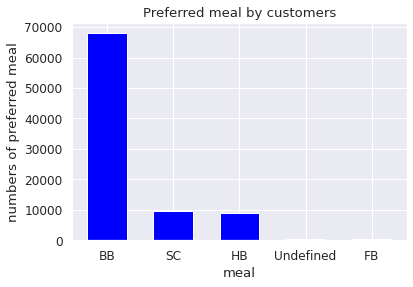

In [222]:
# Visualizsing the data using bar chart

x = most_preferred_meal['meal']
y = most_preferred_meal['Number_of_preferred_meal']
plt.bar(x,y, color = "blue", width = 0.6)
plt.title('Preferred meal by customers')
plt.xlabel('meal')
plt.ylabel('numbers of preferred meal')


plt.show()

**Analysis from above graph.**
>most preferred meal is `BB – Bed & Breakfast`

>`HB-Half Board` and `SC-Self Catering` are equally preferred

## Q2.) What is the percentage distribution of required car parking spaces?

In [223]:
# Fetch the data of required_car_parking_spaces

car_parking_space = hotel_df['required_car_parking_spaces'].value_counts()
car_parking_space

0    80083
1     7280
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

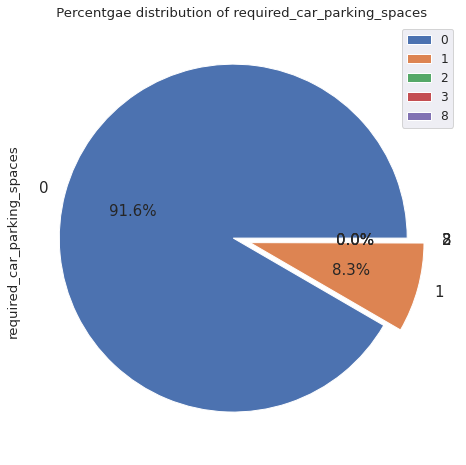

In [224]:
# Visualizsing data by pie chart.

car_parking_space.plot.pie(explode=[0.05]*5,autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15)

plt.title(" Percentgae distribution of required_car_parking_spaces ")
plt.legend()
plt.show() 

**Analysis from above graph.**
>`91.6 % guests did not required the parking space`. only 8.3 % guests required only 1 parking space.

## Q3.) What is the percentage of booking changes made by the customer?

In [225]:
# Fetch the data of type of customers

booking_changes = hotel_df['booking_changes'].value_counts().reset_index()[:5].rename(columns={'index':'customer_type','customer_type':'number of visit'})
booking_changes

,customer_type,booking_changes
0,0,71494
1,1,10902
2,2,3508
3,3,875
4,4,356


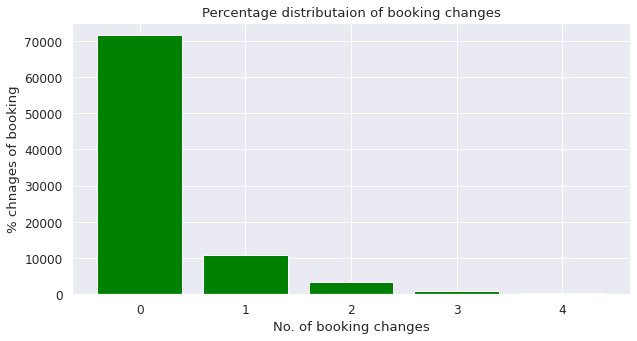

In [226]:
# Visualizsing the data using bar chart

x = booking_changes['customer_type']
y = booking_changes['booking_changes']

plt.figure(figsize=(10,5))
plt.bar(x,y, color = "green")

plt.title('Percentage distributaion of booking changes')
plt.xlabel('No. of booking changes')
plt.ylabel('% chnages of booking')
plt.show()

**Analysis from above graph.**
 Almost `80% of the bookings were not changed by guests.`
>0= 0 changes made in the booking

>1= 1 changes made in the booking

## Q4.) What is Percentage distribution of Deposit type ?

In [227]:
# Fetch the data from deposite_type

distrubution_of_deposite_type = hotel_df['deposit_type'].value_counts()
distrubution_of_deposite_type

No Deposit    86251
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

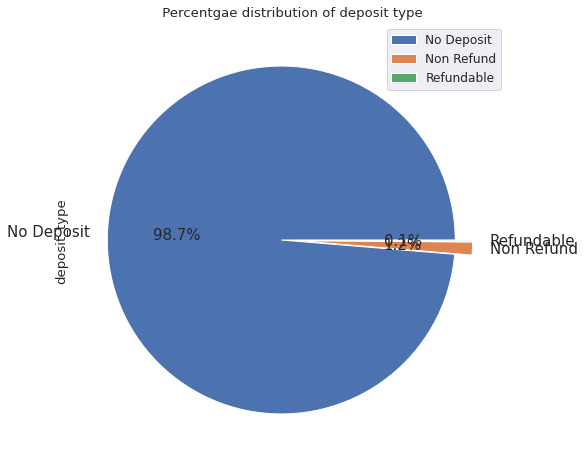

In [228]:
# Visualizsing data by pie chart.

distrubution_of_deposite_type.plot.pie(explode=[0.05]*3, autopct='%1.1f%%', shadow=False, figsize=(14,8), fontsize=15)

plt.title(" Percentgae distribution of deposit type")
plt.legend()
plt.show() 

**Analysis from above graph.**
    
>98.7 % of the guests prefer`No deposit` type of stay.

## Q5.) Which is the most preferred room type by the customers?

In [229]:
# Fetch the data from assigned_room_type

most_preferred_room = hotel_df['assigned_room_type'].value_counts().reset_index().rename(columns={'index':'room_type','assigned_room_type':'count'})
most_preferred_room

,room_type,count
0,A,46313
1,D,22432
2,E,7195
3,F,3627
4,G,2498
5,C,2165
6,B,1820
7,H,706
8,I,357
9,K,276


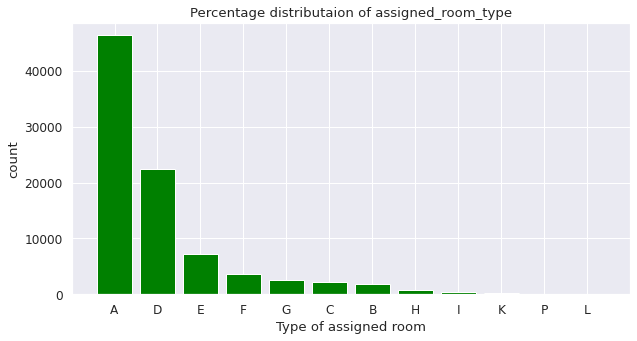

In [230]:
# Visualizsing the data using bar chart

x = most_preferred_room['room_type']
y = most_preferred_room['count']
plt.figure(figsize=(10,5))
plt.bar(x,y, color = "green")
plt.title('Percentage distributaion of assigned_room_type')
plt.xlabel('Type of assigned room')
plt.ylabel('count')
plt.show()

**Analysis from above graph.**
    
>Most preferred Room type is "A".

#	**2.<u>Hotel wise Analysis:**</u>

We will analyse our data on below mentioned points.

1.Which type of hotel is mostly preferred by the guests?

2.What is most preferred stay length in each hotel? 

3.Which hotel has higher lead time?

4.Which hotel makes more revenue?

5.Which hotel has the higher customer retention rate?

6.For which hotel, does people have to wait longer to get a booking confirmed?

7.From which country most guest come?

## Q1.) Which type of hotel is mostly preferred by the guests?

In [231]:
# Fetch the data of hotel
booking_df =hotel_df['hotel'].value_counts()

Text(0.5, 1.0, 'PERCENTAGE BOOKING IN EACH HOTEL')

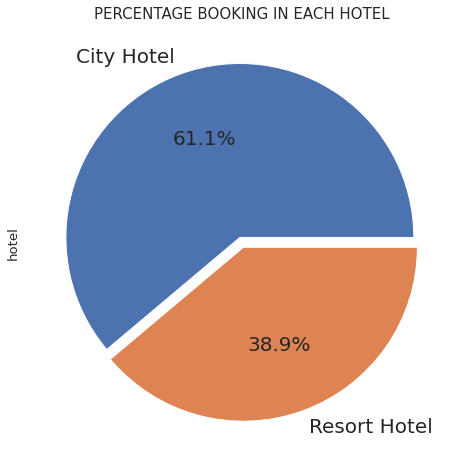

In [232]:
# creating pie chart
ax = booking_df.plot.pie(figsize=(10,8),fontsize=20, autopct='%1.1f%%',explode=[0.03,0.03])

#Setting title
ax.set_title('PERCENTAGE BOOKING IN EACH HOTEL',fontsize=15)

**Analysis from above graph.**

1- City Hotel is most preferred by guests and thus city hotels has got maximum bookings.

**Analysis from above graph.**

1-We have a huge proportion of cancellation rate for city hotel.

## Q2.) What is most preferred stay length in each hotel? 

In [233]:
# creating dataframe for stay
stay_df = hotel_df[hotel_df['is_canceled']==0]
stay_df =stay_df[stay_df['total_stay'] < 15]
stay_df =stay_df.rename(columns={'is_canceled':'Number_of_stay'})


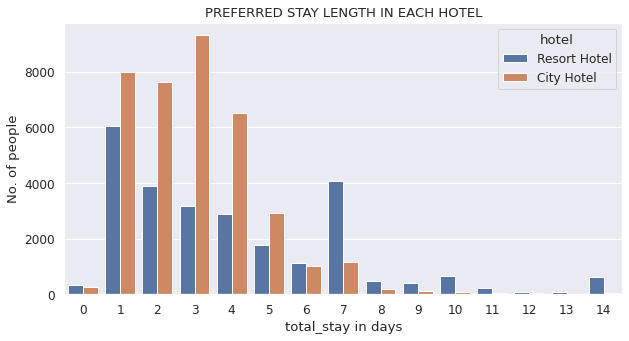

In [234]:
# set plot size and plot barchart
plt.figure(figsize = (10,5))
plt.title('PREFERRED STAY LENGTH IN EACH HOTEL')
sns.countplot(x = stay_df['total_stay'], hue = stay_df['hotel'])

plt.xlabel('total_stay in days')
plt.ylabel('No. of people')
plt.show()

**Analysis from above graph.**

1- Most common stay length is less than 4 days and generally people prefer city hotel for shorter stay, but for longer stay resort hotel is preferred.

## Q3.) Which hotel has higher lead time? 

In [235]:
# dataFrame for lead time
higher_lead = hotel_df.groupby('hotel')['lead_time'].mean().reset_index().rename(columns={'lead_time':'avg_lead_time'})
higher_lead

,hotel,avg_lead_time
0,City Hotel,77.678521
1,Resort Hotel,83.371938


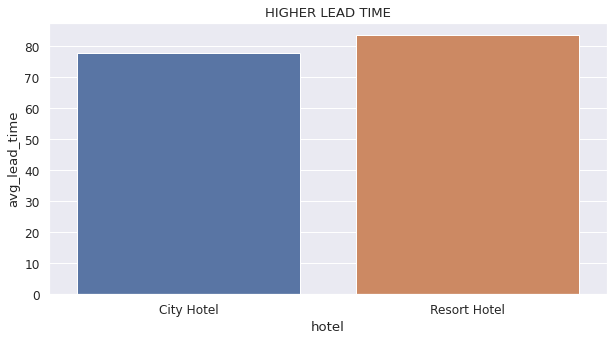

In [236]:
# creating bar chart
plt.figure(figsize=(10,5))
plt.title('HIGHER LEAD TIME')
sns.barplot(x=higher_lead['hotel'],y=higher_lead['avg_lead_time'])
plt.show()

**Analysis from above graph.**

1- Resort hotel has slightly high avg lead time. That means customers plan their trips very early. 

## Q4.) Which hotel makes more revenue? 

In [237]:
# dataframe for revenue
revenue_df = hotel_df.groupby('hotel')['adr'].mean().reset_index().rename(columns={'adr':'avg_adr'})  # calculating average adr
revenue_df

,hotel,avg_adr
0,City Hotel,110.985944
1,Resort Hotel,99.025346


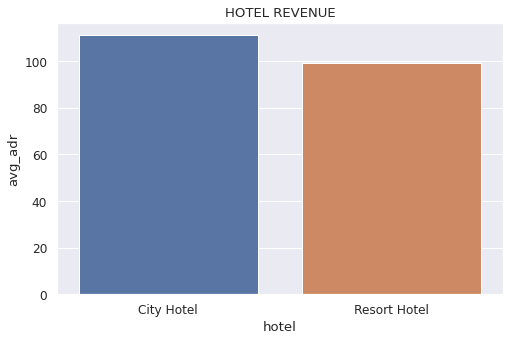

In [238]:
# creating bar chart
plt.figure(figsize = (8,5))
plt.title('HOTEL REVENUE')

# Setting x and y value
sns.barplot(x = revenue_df['hotel'], y = revenue_df['avg_adr'])
plt.show()

**Analysis from above graph.**

1- City hotels has slightly high avg lead time then resort hotel.Thus, city hotel makes slightly more revenue then resort hotel.

## Q5.) Which hotel has the higher customer retention rate?

In [239]:
# repeated_guest=1 
# no_repeated_guest= 0

# creating new DataFrame where bookings are cancelled.
canceled_df=hotel_df[hotel_df['is_canceled']==1]

# Grouping by hotel
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['Total_bookings']=hotel_df.groupby('hotel').size().reset_index().drop('hotel',axis=1)

# Calculating cancel percentage
canceled_df['cancel %']= round(canceled_df['no_of_cancelled_bookings']/canceled_df['Total_bookings']*100,2)

# creating new DataFrame where bookings are cancelled.
repeated_guest=hotel_df[hotel_df['is_repeated_guest']==1]

# Grouping by hotel
repeated_guest=repeated_guest.groupby('hotel').size().reset_index().rename(columns={0: "Total_repeated_guest"})

# # adding 'total booking column for calculating the percentage.
repeated_guest['Total_bookings']=hotel_df.groupby('hotel').size().reset_index().drop('hotel',axis=1)

#Calculating retention_rate
repeated_guest['retention_rate']= round(repeated_guest['Total_repeated_guest']/canceled_df['Total_bookings']*100,2)
repeated_guest

,hotel,Total_repeated_guest,Total_bookings,retention_rate
0,City Hotel,1708,53428,3.20
1,Resort Hotel,1707,33968,5.03


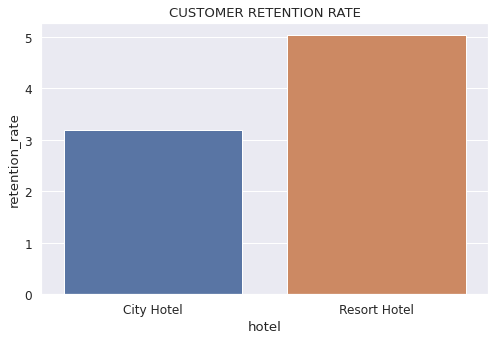

In [240]:
plt.figure(figsize = (8,5))
plt.title('CUSTOMER RETENTION RATE')

# Setting x and y value
sns.barplot(x = repeated_guest['hotel'], y = repeated_guest['retention_rate'],)
plt.show()

**Analysis from above graph.**

1-Resort hotel has higher retention rate compare to city hotel that means customers are willing to stay again in resort hotel.


2- But retention rate for city hotel 3.20% and for resort hotel is 5.03% which is very less.



## Q6.)	For which hotel, does people have to wait longer to get a booking confirmed? 

In [241]:
# dataframe of waiting for booking
waiting_df =hotel_df.groupby('hotel')['days_in_waiting_list'].mean().reset_index().rename(columns = {'days_in_waiting_list':'Avg_waiting_time'})
waiting_df

,hotel,Avg_waiting_time
0,City Hotel,1.020233
1,Resort Hotel,0.323834


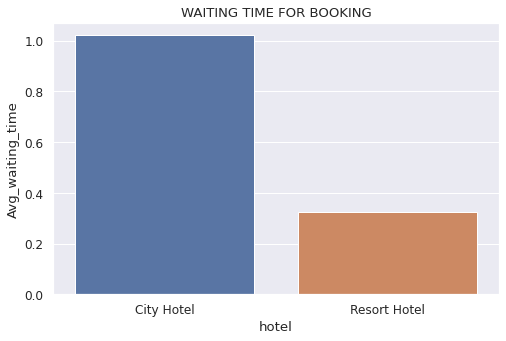

In [242]:
# Visualizing by  plotting the graph
plt.figure(figsize = (8,5))
plt.title('WAITING TIME FOR BOOKING')
sns.barplot(x = waiting_df['hotel'], y = waiting_df['Avg_waiting_time'] )
plt.show()

**Analysis from above graph.**

1- City hotel has significantly longer waiting time then resort hotel, hence City Hotel is much busier than Resort Hotel.

##Q7.) From which country most guest come?

Text(0.5, 1.0, 'NUMBER OF GUESTS FROM DIFFERENT COUNTRIES')

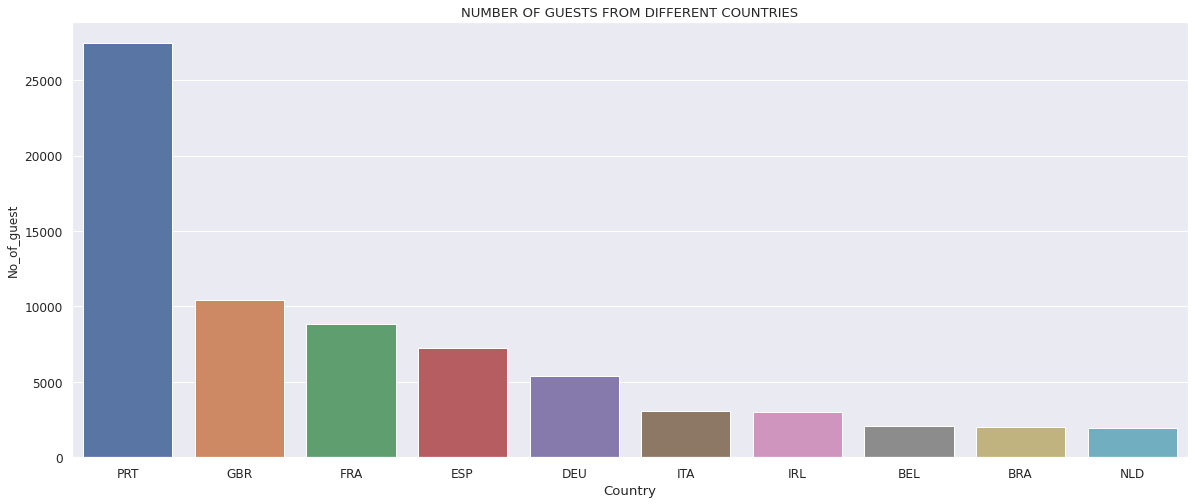

In [243]:
# Counting the guests from various countries.
country_df=hotel_df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'No_of_guest'})[:10]
country_df

# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['No_of_guest'])
plt.xlabel('Country')
plt.ylabel('No_of_guest',fontsize=12)
plt.title("NUMBER OF GUESTS FROM DIFFERENT COUNTRIES")

In [244]:
# used to show countries
basemap = folium.Map()
guests_map = px.choropleth(country_df, locations = country_df['country'],color = country_df['No_of_guest'], hover_name = country_df['country'])
guests_map.show()

**Analysis from above graph.**

1-  We have a huge number of visitors from western europe, namely Portugal, UK and France being the highest. 

2-  We can instruct the marketing team to target people of this region






#**3.<u>Distribution channel wise Analysis:**</u>

As for in the hotel industry booking is one of the key  factors & there are different modes of booking for each hotel. These modes of booking are  called distribution channel. We are  going to analyse our data w.r.t. Distribution Channel. 

We will analyse our data on below mentioned points.

1.Which  Distribution Channel is contributing in most  of the hotel  bookings?

2.Which channel is  contributing most for early booking of the hotel?

3.Which distribution channel brings better revenue generating deals for hotels?

4.Which is the most favourable Channel for Customers to book hotel?

##Q1.) Which  Distribution Channel is contributing in most  of the hotel  bookings?

In [245]:
# Creating Dataframe for hotel_df
hotel_df["distribution_channel"].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [246]:
# Dataframe for distributed channel
distribution_channel_analysis=hotel_df["distribution_channel"].value_counts()
print(distribution_channel_analysis)

TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64


Text(0.5, 1.0, 'Booking % by Distribution Channels')

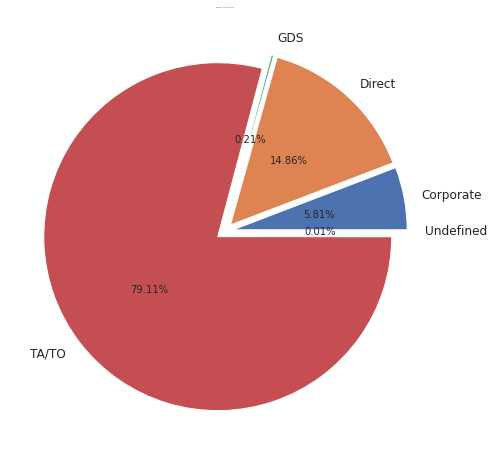

In [247]:
# Defining group by distribution
group_by_dc=hotel_df.groupby('distribution_channel')
d1=pd.DataFrame(round(group_by_dc.size()/hotel_df.shape[0]*100,2)).reset_index().rename(columns={0:'Booking_%'})
plt.figure(figsize=(8,8))
data=d1['Booking_%']

# Visualizing by  plotting the graph
labels=d1['distribution_channel']
plt.pie(x=data,autopct='%.2f%%', explode=[0.05]*5, labels=labels,pctdistance=0.5)
plt.title('Booking % by Distribution Channels', fontsize=1)

**Analysis from above graph.**

1- Highest Booking received by the hotels are through TA/OT so they are one of the most trusted booking provider.

2- Also Direct booking count is greater than GDS system so still customer does not have complete faith over online booking platforms.

##Q2.) Which channel is  contributing most for early booking of the hotel?

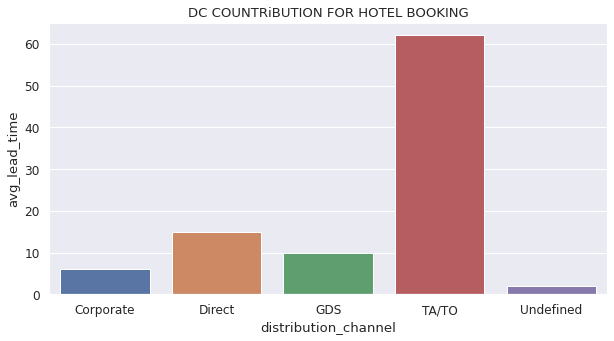

In [248]:
# early booking df
group_by_dc = hotel_df.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'avg_lead_time'})


# Visualizing by  plotting the graph
plt.figure(figsize = (10,5))
sns.barplot(x = d2['distribution_channel'], y = d2['avg_lead_time'])
plt.title("DC COUNTRiBUTION FOR HOTEL BOOKING")
plt.show()

**Analysis from above graph.**

we concluded that the most of the bookings we have received from TA/TO.

Other than undefined the least booking we have received from Corporate.

##Q3.) Which distribution channel brings better revenue generating deals for hotels?

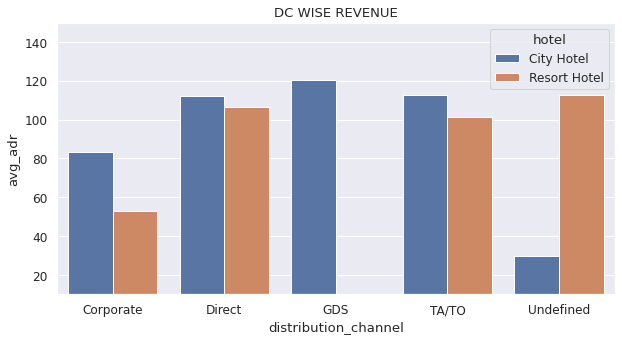

In [249]:
# Dataframe for revenue generation
group_by_dc_hotel = hotel_df.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})

# Visualizing by  plotting the graph
plt.figure(figsize = (10,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(10,150)
plt.title("DC WISE REVENUE")
plt.show()

Conlusions could be drawn from above analysis:

1-In terms of revenue GDS is the most revenue generating Channel but its only for City hotel. For Resort Hotel its contribution is negligible as compared to other channels distribution.

2- Undefined can be associated to multiple channel distribution channels whose data is not provided so after undefined bookings from TA/TO are generating most revenue for the  Resort Hotel. 

3-Apart from other ditribution channel Direct bookings are also playing the crucial role in terms of revenue generation but  we need to focus more on other less revenue generating mediums in order to increase the overall revenue.

##Q4.) Which is the most favourable Channel for Customers to book hotel?

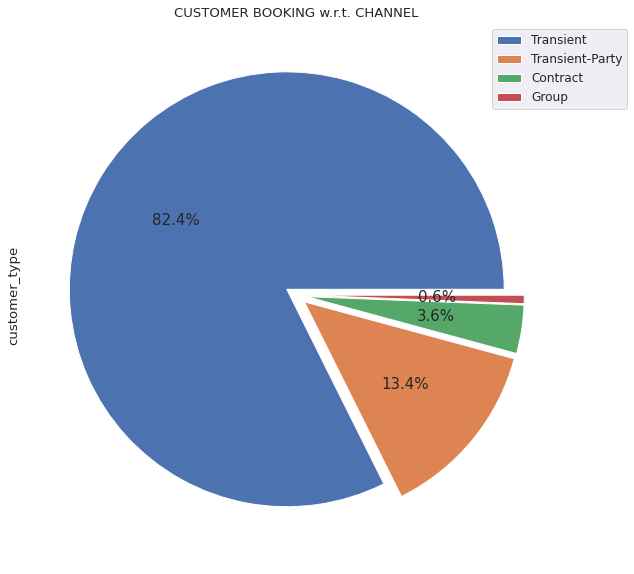

In [250]:
hotel_df['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow= False,autopct='%1.1f%%', fontsize=15,labels=None, figsize=(10,10))

# Visualizing by  plotting the graph
labels=hotel_df['customer_type'].value_counts().index.tolist()
plt.title("CUSTOMER BOOKING w.r.t. CHANNEL")
plt.legend(bbox_to_anchor=(0.85,1), loc='upper left', labels=labels)

Transient Booking - These are walk-in bookings, last minute or bookers or simply people that require a very short term stay

Transient Party - They are somewhere linked to Transient Group.

Contract Booking- These booking are on contract basis made by the hoteliers with their partners.

Group Booking- The booking made in groups of 1 or more than 1 room. Generraly it is of more than 1 room.

#**4.<u>Booking Cancellation analysis:**</u>

We will analyse our data on below mentioned points.

1.Which hotel has higher booking cancellation rate?

2.How many bookings were cancelled ?

3.Which significant distribution channel has highest cancellation percentage?

4.What is Yearwise Percentage of Cancellations?

5.Which period of year has longer lead time analysis?

6.What is Average Daily Rate Yearwise and Monthwise?


## Q1.) Which hotel has higher booking cancellation rate? 

In [251]:
# booking canceled=1 
# booking not canceled= 0

# creating new DataFrame where bookings are cancelled.
canceled_df=hotel_df[hotel_df['is_canceled']==1]

# Grouping by hotel
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['Total_bookings']=hotel_df.groupby('hotel').size().reset_index().drop('hotel',axis=1)
canceled_df

# Calculating cancel percentage
canceled_df['cancel %']= round(canceled_df['no_of_cancelled_bookings']/canceled_df['Total_bookings']*100,2)
canceled_df

,hotel,no_of_cancelled_bookings,Total_bookings,cancel %
0,City Hotel,16049,53428,30.04
1,Resort Hotel,7976,33968,23.48


Text(0.5, 1.0, 'PERCENTAGE BOOKING CANCELLATION')

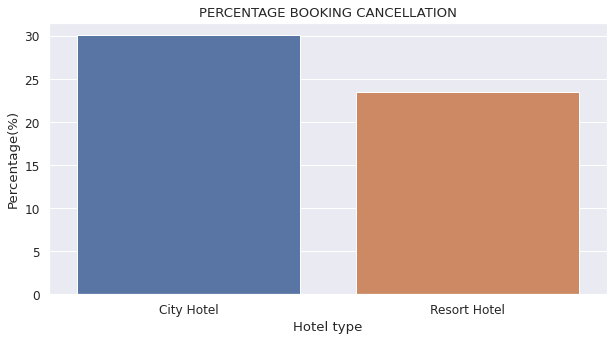

In [252]:
# Visualizing by  plotting the graph
plt.figure(figsize=(10,5))
sns.barplot(x=canceled_df['hotel'],y=canceled_df['cancel %'])

# Set labels
plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("PERCENTAGE BOOKING CANCELLATION")

**Analysis from above graph.**

City hotel is having hight cancellation rate.

##Q2.) How many bookings were cancelled ?

In [253]:
#Here Using unique we got to know that there are five types of distribution channel
hotel_df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



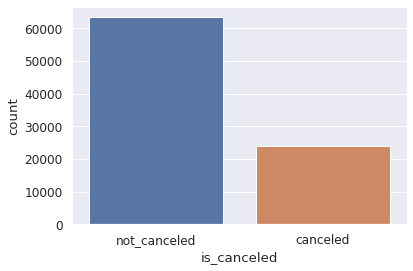

In [254]:
#Using Count plot we will analyse total cancellations.
hotel_df['is_canceled'] = hotel_df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = hotel_df['is_canceled']

sns.countplot(canceled_data)

**Analysis from above graph.**

From above plot, it seems that majority of bookings were not canceled.

##Q3.) Which significant distribution channel has highest cancellation percentage? 

Text(0.5, 1.0, 'Graph showing cancellation rates from different distribution channel')

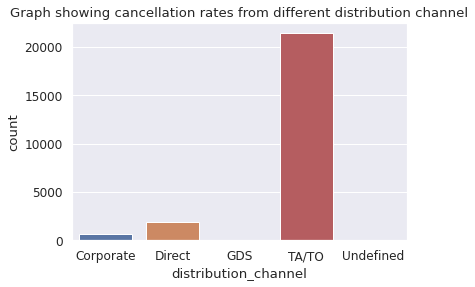

In [255]:
#Using barplot we will analyze through which distribution channel has highest cancellation percentage.
lst1 = ['is_canceled', 'distribution_channel']
type_of_hotel_canceled = hotel_df[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['distribution_channel']).size().reset_index(name = 'count')

# Visualizing by  plotting the graph
sns.barplot(data = canceled_hotel, x = 'distribution_channel', y = 'count').set_title('Graph showing cancellation rates from different distribution channel')

**Analysis from above graph.**

we can analyse that from Travel Agent booking list, maximum cancellation have been observed.

##Q4.) What is Yearwise Percentage of Cancellations?




In [256]:
#Using unique function, we have got unique values from column
hotel_df['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [257]:
#Made new column from reservation status date using DatetimeIndex
hotel_df['year'] = pd.DatetimeIndex(hotel_df['reservation_status_date']).year

In [258]:
#Using Unique function, total years in year column
hotel_df['year'].unique()

array([2015, 2014, 2016, 2017])

**So, given data set is of four years from 2014 to 2017**




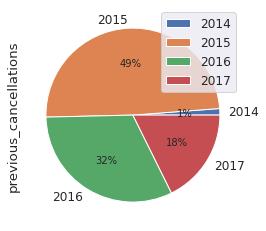

In [259]:
#Using Pie Chart
hotel_df.groupby(['year']).sum().plot(kind='pie', y='previous_cancellations', autopct='%1.0f%%')

**Analysis from above graph.**

From Pie Chart, it can be seen that maximum cancellation has been done in year 2015.

##Q5.) Which period of year has longer lead time analysis?

In [260]:
#adding new column month
hotel_df['month'] = pd.DatetimeIndex(hotel_df['reservation_status_date']).month

In [261]:
#lead time analysis monthwise
lead_time_analysis = hotel_df.groupby(['month'])['lead_time'].mean()

Text(0, 0.5, 'lead_time ')

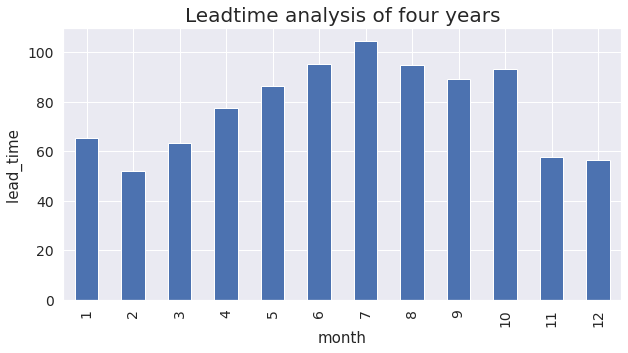

In [262]:
# Create the figure object 
ax = lead_time_analysis.plot.bar(figsize = (10,5),fontsize = 14)

# Set the title
ax.set_title("Leadtime analysis of four years", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("month", fontsize = 15)
ax.set_ylabel("lead_time ", fontsize = 15)

**Analysis from graph**:

From here we can see that in month of October, longer lead time can be seen.

##Q6.) What is Average Daily Rate Yearwise and Monthwise?

In [263]:
#average daily rate monthwise
month_wise_adr = hotel_df.groupby(['month', 'hotel'])['adr'].mean().unstack()
month_wise_adr

hotel,City Hotel,Resort Hotel
month,,
1,94.962027,68.847287
2,98.414578,66.133900
3,100.700799,72.931812
4,118.002002,88.728738
5,127.078363,92.317647
6,121.584231,120.875239
7,121.113003,148.952197
8,122.074545,179.507092
9,117.080850,108.568475


From given data set, we can see that maximum avg daily rate is in City Hotel in month of May.

In [264]:
#we have used maximum function here
month_wise_adr['City Hotel'].max()

127.0783631859756

*From* given data set, we can see that maximum avg daily rate is in Resort Hotel in month of August.

In [265]:
#Average daily rate yearwise
year_wise_adr = hotel_df.groupby(['year', 'hotel'])['adr'].mean().unstack()
year_wise_adr

hotel,City Hotel,Resort Hotel
year,,
2014,62.800000,0.000000
2015,88.981602,93.548530
2016,108.144116,90.710522
2017,123.019506,114.466214


From above table, we can see that maximum average rate was in year 2017 in both City and Resort hotel.

Text(0.5, 0, 'hotel Type')

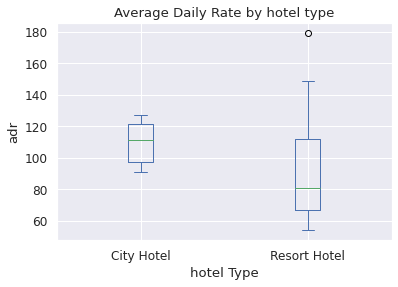

In [266]:
#Using box plot, analysis of average daily rate
hotel_df.groupby(['month', 'hotel'])['adr'].mean().unstack().plot(kind="box")
plt.title('Average Daily Rate by hotel type')
plt.ylabel('adr')
plt.xlabel('hotel Type')

**Analysis from graph**:

From box plot we can see that average daily rate is more in Resort hotel than City Hotel.

#**5.<u>Customer centric analysis:**</u>


We will analyse our data on below mentioned points.


1.Which type of hotel is better choice for families?

2.How not getting same room as reserved affects adr?

3.Overview of arrival period

4.Whether Stay is over a weekend or weekday??

## Q1.) Which type of hotel is better choice for families?

In [267]:
hotel_df['adults'].groupby(hotel_df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,53428.0,1.876338,0.544292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,33968.0,1.874941,0.737498,0.0,2.0,2.0,2.0,55.0


**Analysis from graph**:

Looking into children and comparing it with hotel types only.

In [268]:
hotel_df['children'].groupby(hotel_df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,53428.0,0.131841,0.442161,0.0,0.0,0.0,0.0,3.0
Resort Hotel,33968.0,0.149317,0.476450,0.0,0.0,0.0,0.0,10.0


**Analysis from graph**:

Mean values for adults and children are higher. This means that resort hotels are better choice for large families.

##Q2.) How not getting same room as reserved affects adr?

Rooms Assigned to the Guests according to their reservation and the Reservation Status of the guest who are assigned different rooms.

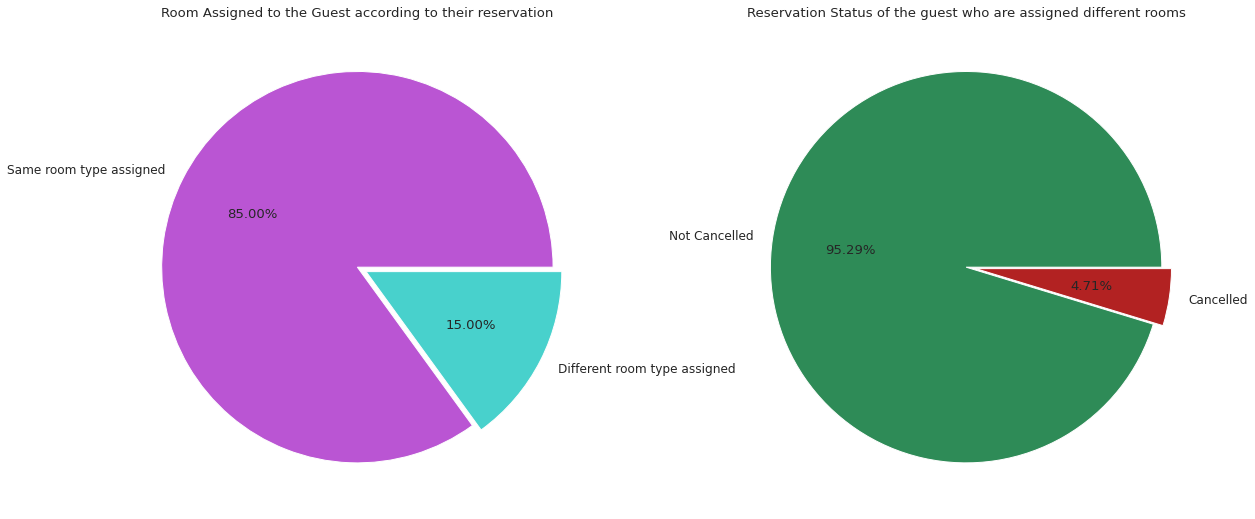

In [269]:
# Parameters
plt.rcParams['figure.figsize'] = [20, 9]
fig, ax = plt.subplots(1, 2)
sns.set(font_scale = 1.1)

r = hotel_df[['is_canceled', 'reserved_room_type', 'assigned_room_type']].copy()

def samediff(x, y):
    if x == y:
        return ("Same")
    else:
        return ("Diff")
    
r['assignment'] = r.apply(lambda x : samediff(x.reserved_room_type, x.assigned_room_type), axis = 1)

len(r.loc[r.assignment == 'Diff', :]['is_canceled'])
cnc = r.loc[r.assignment == 'Diff', :]['is_canceled'].value_counts()

r = r['assignment'].value_counts()

# pie chart for the assigned room type
ax[0].pie(r.values, labels = ['Same room type assigned', 'Different room type assigned'],
        autopct='%.02f%%', explode = [0, 0.05], colors = ['mediumorchid', 'mediumturquoise']);
ax[0].set_title('Room Assigned to the Guest according to their reservation');

# pie chart for the reservations status who are assigned different rooms
ax[1].pie(cnc.values, labels = ['Not Cancelled', 'Cancelled'],
        autopct='%.02f%%', explode = [0, 0.05], colors = ['seagreen', 'firebrick']);
ax[1].set_title('Reservation Status of the guest who are assigned different rooms');

**Analysis from above graph.**

From here we can calculate that those who were not assigned same room as reserved does not affects adr.

From pie chart we can analyse that only 5.39% guest cancelled their reservation after assigning different rooms.

##Q3.) Overview of arrival period

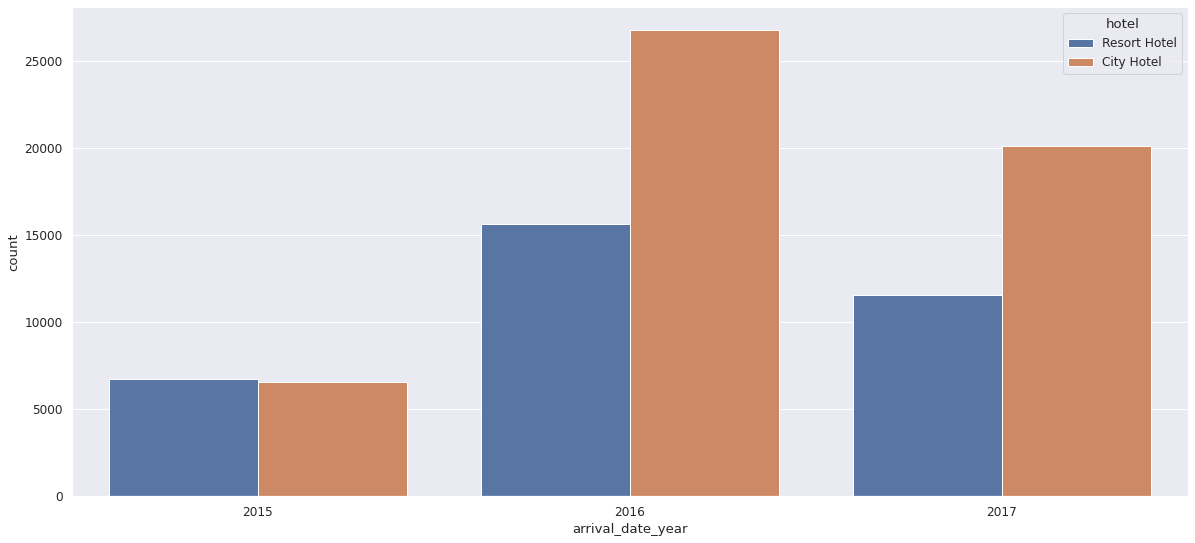

In [270]:
# defining arrival_attribites
arrival_attributes = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = hotel_df[arrival_attributes]
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel')

Text(0, 0.5, 'Count')

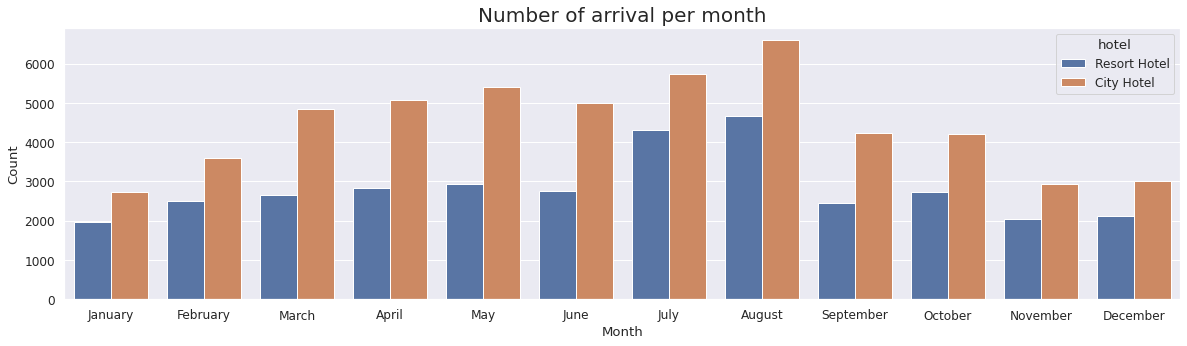

In [271]:
# Visualizing by  plotting the graph
plt.figure(figsize=(20,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

Text(0.5, 1.0, 'Graph showing number of arrival per day')

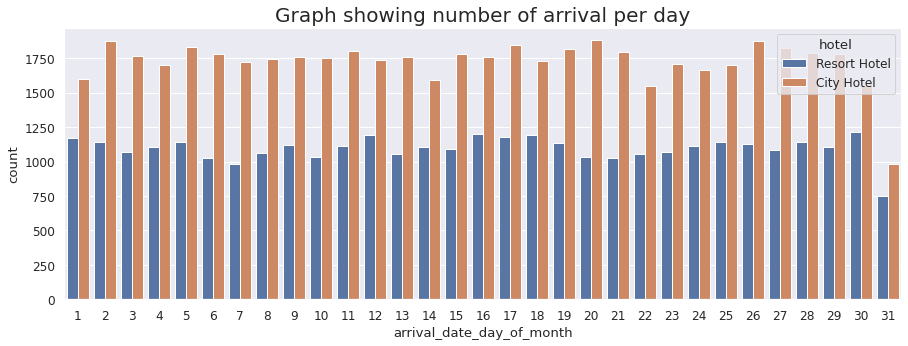

In [272]:
# Visualizing by  plotting the graph
plt.figure(figsize=(15,5))

sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Graph showing number of arrival per day', fontsize = 20)

Analysis from above Graph:
1. 2016 seems to be year where hotel booking is at its highest.
2. Increeasing trend in booking around middle of year with August being highest.
3. Summer ends in Aug followed by autumn, so it seems that summer period is a peak for hotel booking.
4. Trend for the arrival day of month has been roller coaster. 

Lets analyse most people tend to book over weekends or not?

##Q4.) Whether Stay is over a weekend or weekday??

(0.0, 12.0)

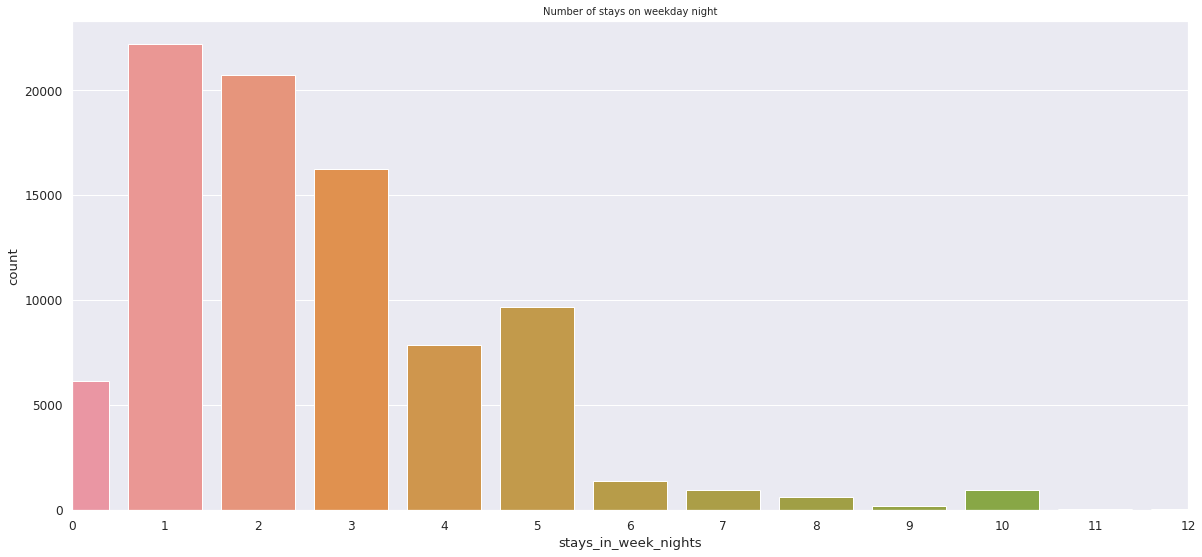

In [273]:
# Visualizing by  plotting the graph
sns.countplot(data = hotel_df, x = 'stays_in_week_nights' ).set_title('Number of stays on weekday night' , fontsize = 10)
plt.xlim(0,12)

(0.0, 6.0)

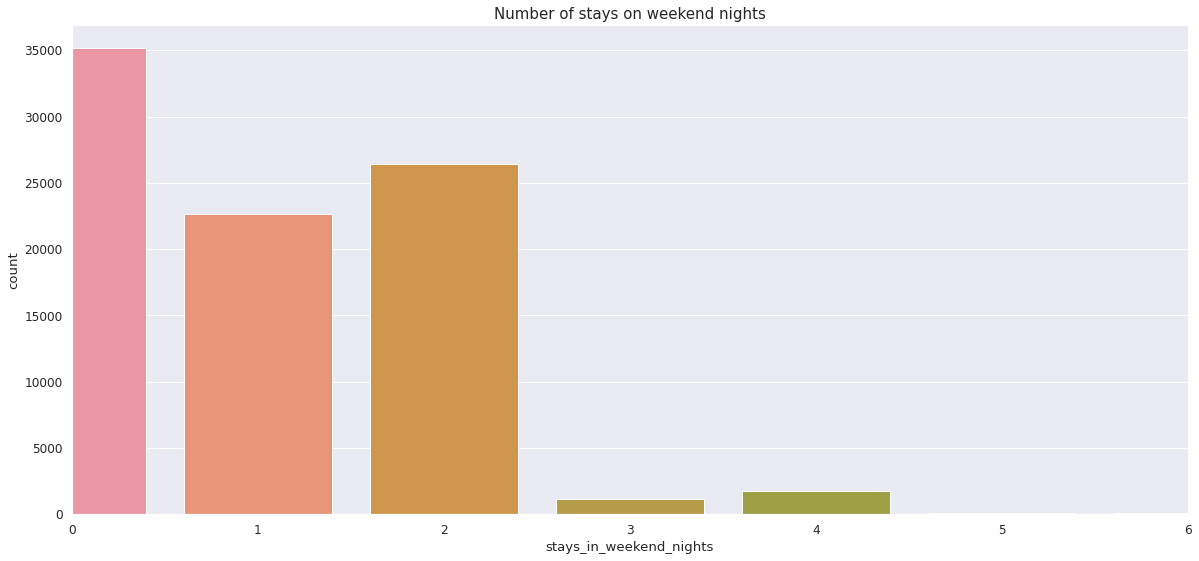

In [274]:
# Visualizing by  plotting the graph
sns.countplot(data = hotel_df, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 15)
plt.xlim(0,6)

**Analysis from above graph.**

 Majority of the stays are over the weekday's night. 
Whatever we saw for the chart on day of the month was random.

##Q5.)Prediction of whether or not a hotel was likely to receive a disproportionately high number of special requests?

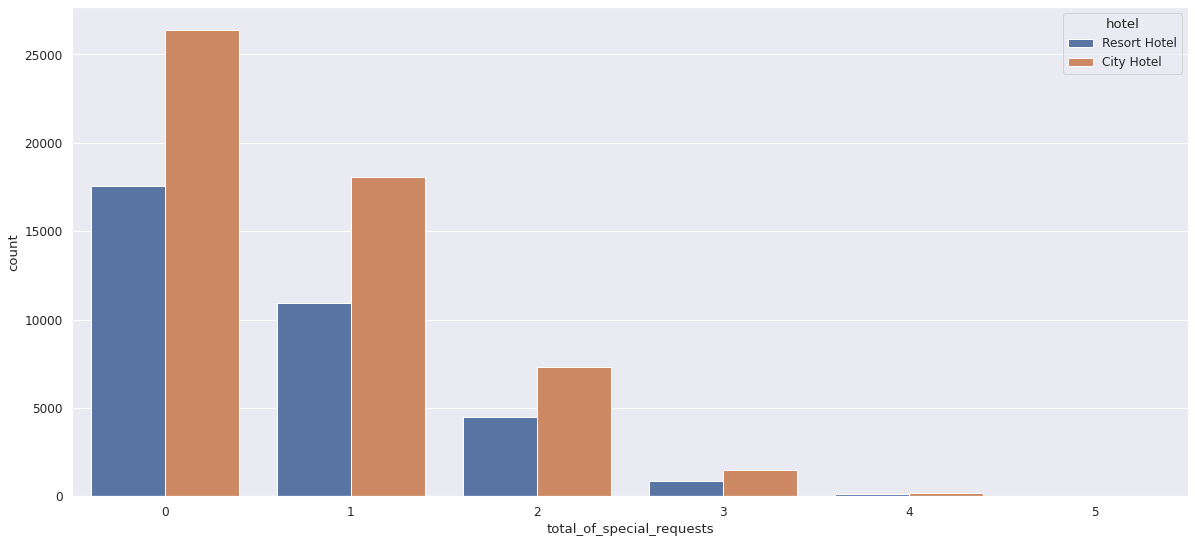

In [275]:
# dataframe for special req.
df1 = ['hotel', 'total_of_special_requests', ]
df2= hotel_df[df1]
sns.countplot(data = df2, x = 'total_of_special_requests', hue = 'hotel' )

**Analysis from above graph.**

More of special request is for city hotel. 

#6.<u>**Conclusion:**</u>

- City Hotel is most preferred by guests and thus city hotels has got maximum number of bookings. So from business perspective, we should target those months between May to Aug.
- In case of city hotel, months with high bookings (May, June, September, October)witnessed more cancellations. 
- Guest numbers for the Resort hotel go down slighty from June to September though variations in bookings and cancellations are less in case of resort hotel. 
- Both hotels have the fewest guests during the winter.
- Most of the bookings we have received from TA/TO and  the least booking we have received from Corporate.
- Since 98.7 % of the guests prefer No deposit type of stay.The high rate of cancellations can be due to high no deposit policies.
- Most common stay length is less than 4 days and generally people prefer city hotel for shorter stay, but for longer stay resort hotel is preferred.Resort hotel has slightly high avg lead time that means customers plan their trips very early.
- Resort hotel has higher retention rate compare to city hotel that means customers are willing to stay again in resort hotel but retention rate for city hotel 3.20% and for resort hotel is 5.03% which is very less.
Most preferred Room type is "A".
most preferred meal is BB(Bed & Breakfast) whike HB(Half-Board) and SC(Self Catering) are equally preferred. 91.6 % guests did not required the parking space and only 8.3 % guests required only 1 parking space.

- City hotel has significantly longer waiting time then resort hotel, hence city Hotel is much busier than Resort Hotel.
Also,City hotels has slightly high avg lead time then resort hotel.Thus, city hotel makes slightly more revenue then resort hotel.
The City hotel has more guests during spring and autumn, when the prices are also highest, In July and August there are less visitors, although prices are lower. Thus, customers can get good deal on bookings in July and August in city hotel.

- Cancellations are high when done through agents compared to direct bookings. Hotels need to do marketing and give special incentives for direct bookings as these may establish personal one to one relationships promoting customer loyalty.

- Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest. Thus, these months should be avoided for bookings.

- We have a huge number of visitors from western europe, namely Portugal, UK and France being the highest.We can instruct the marketing team to target people of this region.

- The highest Booking received by the hotels are through TA/OT so they are one of the most trusted booking provider.Also Direct booking count is greater than GDS system so still customer does not have complete faith over online booking platforms.

- In terms of revenue, GDS is the most revenue generating Channel but its only for City hotel. For Resort Hotel its contribution is negligible as compared to other channels distribution.

- The Average daily rate is more in Resort hotel than City Hotel. Prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less and is most expensive during Spring and Autumn.

- The maximum average rate was in year 2017 in both City and Resort hotel.

- Those who were not assigned same room as reserved does not affects adr.
From pie chart we can analyse that only 5.39% guest cancelled their reservation after assigning different rooms.

- 2016 seems to be year where hotel booking is at its highest and it seems summer period is a peak for hotel booking.Trend for the arrival day of month has been roller coaster.

- The majority of the stays are over the weekday's night so target should be given and on the other day  of the month it was random.

-  City Hotel receive a disproportionately high number of special requests.

#7.<u>**Final Summary of conclusion:**</u>

- City hotel is most prefered by customers and can generate more revenue than Resort Hotel.
- For larger familes and for longer stay, Resort hotel is more preferred by customer.
- Also, guests prefer to book with no deposit type of stay which also has impact of high rate of previous cancellation despite booking in city hotel is more.
- Customers are planning their trip early because Longer lead time has been observed in month of Aug. Customers can get good amount of deal in month of July and Aug where prices are low.
- Travel agent has been main distribution channel to book tickets and GDS is most revenue generating channel for city hotel.
- Guest are getting almost same room which has been asked for and only 15% of them have been assigned different room type. From Those who got different room type, only neglible has cancelled their booking which is not affecting adr as much.
-Since demand of City hotel is already been more, so special request for same is also more.